# Investigating the possibility of predicting the presence of heart disease with cheap, non-invasive and easily measured anthropometric measures.

The goal of this analysis to the establish non-invasive predictors of the presence of heart disease from data from the Cleveland Heart Disease Study  [1]. 

This dataset was also used in a relatively recently published study that shows that the prevalence of heart disease can be accurately predicted with small sets of variables [2]. Although this dataset is too small to be used for ML purposes, due to the fact the datset must be split to generate training and test data, it is possible to generate synthetic data samples with properties that resemble those of the population in this dataset. Although there are issues with this approach, namely that it assumes that the popultion in this dataset is in turn representative of the rest of the US population, this is a novel approach to a key problem in predictive healthcare that may have utility in the future. The end product of this endevour, was an predictive accuracy for heart disease of 97%, a 16% increase over the original model. It remains to be tested if this approach has utility with large and more representative datasets.

This being said, the previously quoted study shows the potential to predict the presence of heart disease with a dataset that uses mostly easily measured, cheap and non-invasive anthropometric variables. To this end, I will examine the variance and populational differences of a sub-set of these variables; namely those variables that can be easily and accurately measure, are non-invasive and are cheap; in individuals with and without heart disease. This is a worthwhile endevour as it is a first step in establishing the accuracy of predicting the presence of disease states with variables that are easy to measure to accurately, cheap and non-invasive. This approach should it prove succesful, could be of utility in the provision of healthcare advice and interventions to those geographically removed from the provision of healthcare.

Among the variables included in the study, all variables are readily measurable non-invasibly other than the labelling of major vessels by fluoroscopy, the test that involve thalium imaging  and the measuring of blood biomarkers such as serum cholesterol or blood sugar. Of these tests, the blood biomarkers are readily measurable by low risk, automatable finger prick tests. With the inclusion of these variables it is theoretically possible to measure 10 of the variables included in this study via remote and automated methods. These variables are marked with an * in the table below.

The variables described in this dataset are detailed below:


| Variable                                    | Variable Description                               |
|---------------------------------------------|----------------------------------------------------|
| Age*                                        | Age in years                                       |
| Sex                                         | 1=male, 0=female                                   |
| CP*                                         | Chest Pain Type, Range 0-3, 0=none, 3=max severity |
| trestbps*                                   | Resting systolic blood pressure                    |
| chol* : fasting serum cholestoral in mg/dl  | fasting serum cholesterol in mg/dl                 |
| fbs*                                        | fasting blood sugar in mg/dl                       |
| restecg*                                    | resting electrocardiograph results                 |
| thalach                                     | maximum heartrate from thalium test                |
| exang*                                      | exercise induced angina (0=no, 1=yes)              |
| oldpeak*                                    | ST depression induced by exercise relative to rest |
| slope*                                      | slope of the peak exercise ST segment              |
| ca                                          | number of major vessels colored by flouroscopy     |
| thal                                        | 1=normal, 2=fixed defect, 3=reversable             |
| target                                      | Presence of heart disease (1=true, 0=false)        |


Of significance is that this is real anonymized patient data. It is hard to come across data like this freely, due to concerns regarding anonymization and patient's rights. There are only a few publically facing datasets that compare to this dataset, and those that are available have a fairly rigorous ethical approval process to obtain. Although the dataset is small it has been previously shown to be sufficiently large and have a sufficient sample size and number of variables for accurate heart disease prediction (>97%) [2].

## References
1. Jabbar, M. A., Priti Chandra, and B. L. Deekshatulu. ”Cluster based association rule mining
for heart attack prediction.” Journal of Theoretical and Applied Information Technology 32.2
(2011): 196-201
2. https://scholar.smu.edu/cgi/viewcontent.cgi?article=1038&context=datasciencereview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
import seaborn as sns
%matplotlib inline
heartdisease_df= pd.read_csv('heart.csv')
print(heartdisease_df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

# Summary statistics and visualizations

In [3]:
heartdisease_df= pd.read_csv('heart.csv')
print(heartdisease_df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

## Initial Data summary

The description of the data shows that although there are no missing variables (there are 303 different entries for each variables), certain variables have very high variance and this needs to be explored in depth. 

On further analysis, it seems what were expected to be continous anthropometric variables have been converted into scaled, categorical variables. Accordingly, I have not included the mean or SD for these values. The descriptive statistics for the continous variables are detailed below:

| Variable                                         |  Mean  | Standard Deviation |
|--------------------------------------------------|--------|--------------------|
| Age                                              | 54.37  | 9.08               |
| Resting Systolic Blood Pressure                  | 131.62 | 17.5               |
| Cholesterol: fasting serum cholestoral in mg/dl  | 246.26 | 51.8               |

The high variance for age is explained by the high range (minimum=29, maximum=77). Cholesterol has a naturally high variance and although it is a risk factor for heart disease, it is possible to have low cholesterol and high heart disease as it is possible to have high cholesterol and a lack of heart disease.

As mentioned, some of the other variables seem to have high variance, strange distributions and central tendencies. On closer inspection these variables are the ones that have been converted to scaled, categorical variables and binary values. This explains the previous observation.

The variables that have been converted to scaled, categorical variables and binary values are as follows. 

' = scaled, catergorical variables
'' = binary variable


| Variable                                    | Categories                                         |
|---------------------------------------------|----------------------------------------------------|
| Sex''                                       | 1=male, 0=female                                   |
| CP'                                         | 0=none, 3=max severity                             |
| fbs'                                        | 0=bs<120mg/dl, 1=bs>120mg/dl                       |
| restecg'                                    | 0=normal, 1= abnormality, 2=probable/definite lvh  |
| exang''                                     | exercise induced angina (0=no, 1=yes)              |
| slope'                                      | 1=upsloping, 2=flat, 3=downsloping                 |
| ca'                                         | number of major vessels colored by flouroscopy     |
| thal'                                       | 1=normal, 2=fixed defect, 3=reversable             |
| target''                                    | Presence of heart disease (1=true, 0=false)        |

The distribution of these variables have been appropriately visualized below:

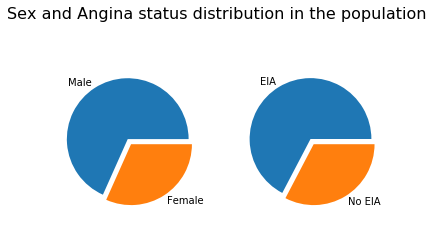

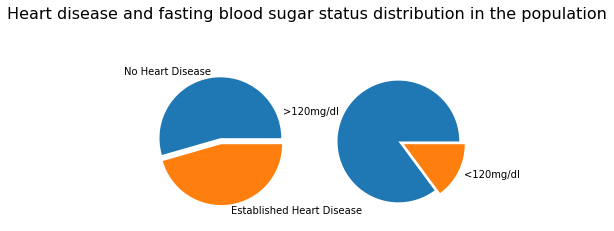

In [4]:
# Create numeric counts
explode_settings=(0.1,0)
sexlabels = ['Male', 'Female']
anginalabels = ['EIA', 'No EIA']
fbslabels = ['>120mg/dl','<120mg/dl']
hdlabels=['No Heart Disease', 'Established Heart Disease']
heartdiseasecolors= ['yellowgreen', 'lightcoral'] 
noheartdiseasecolors = ['gold', 'lightskyblue']

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Sex and Angina status distribution in the population', fontsize=16)

sex_counts = pd.DataFrame(heartdisease_df.sex.value_counts())
ex_angina_counts = pd.DataFrame(heartdisease_df.exang.value_counts())
hd_counts = pd.DataFrame(heartdisease_df.target.value_counts())
fbs_over120mgdl_counts = pd.DataFrame(heartdisease_df.fbs.value_counts())

ax1.pie(sex_counts, explode=explode_settings, labels=sexlabels)
ax2.pie(ex_angina_counts,explode=explode_settings, labels=anginalabels)
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Heart disease and fasting blood sugar status distribution in the population', fontsize=16)
ax1.pie(hd_counts, explode=explode_settings, labels=hdlabels)
ax2.pie(fbs_over120mgdl_counts,explode=explode_settings, labels=fbslabels)
plt.show()






Populational distribution of all continous variables within the dataset


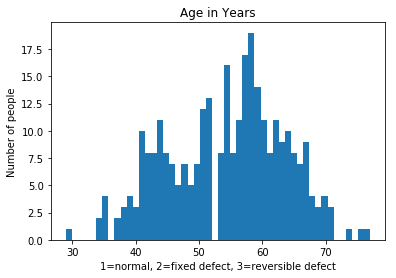

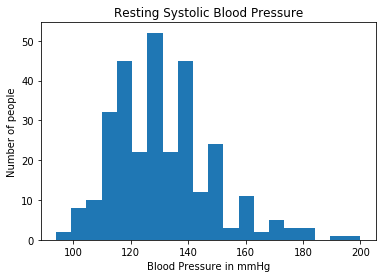

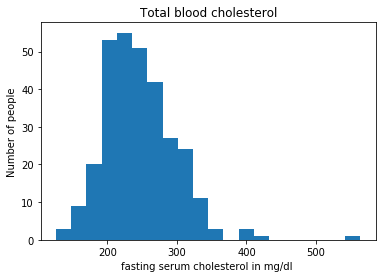

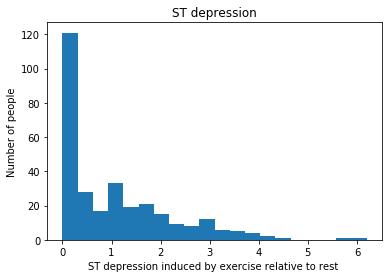

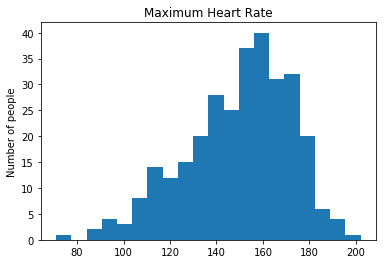

In [4]:
print('Populational distribution of all continous variables within the dataset')

plt.hist(heartdisease_df['age'], bins=50)
plt.title('Age in Years')
plt.xlabel('1=normal, 2=fixed defect, 3=reversible defect')
plt.ylabel('Number of people')
plt.show()

plt.hist(heartdisease_df['trestbps'], bins=20)
plt.title('Resting Systolic Blood Pressure')
plt.xlabel('Blood Pressure in mmHg')
plt.ylabel('Number of people')
plt.show()

plt.hist(heartdisease_df['chol'], bins=20)
plt.title('Total blood cholesterol')
plt.xlabel('fasting serum cholesterol in mg/dl ')
plt.ylabel('Number of people')
plt.show()


plt.hist(heartdisease_df['oldpeak'], bins=20)
plt.title('ST depression')
plt.xlabel('ST depression induced by exercise relative to rest ')
plt.ylabel('Number of people')
plt.show()

plt.hist(heartdisease_df['thalach'], bins=20)
plt.title('Maximum Heart Rate')
plt.ylabel('Number of people')
plt.show()







Populational dstribution of chest pain status, ECG status, Heart Defect status and ECG slope status in the dataset


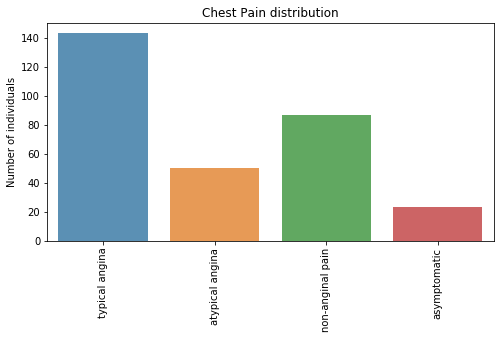

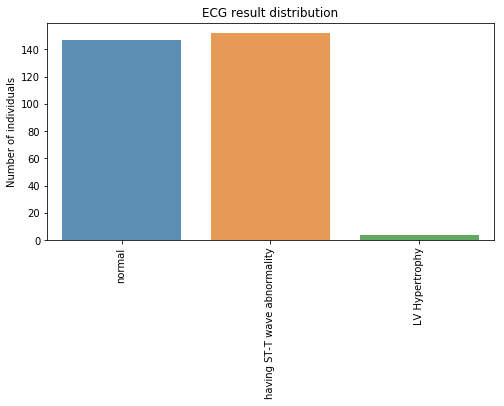

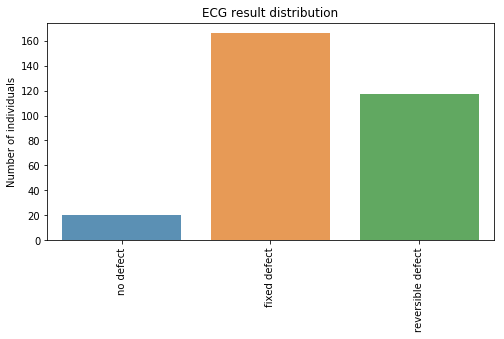

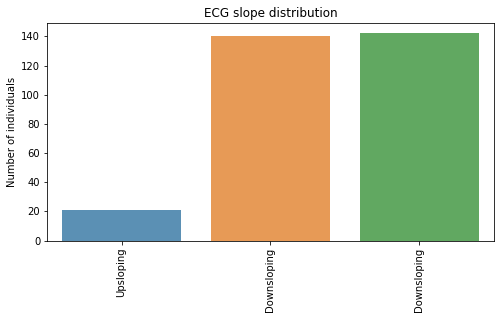

In [5]:
print('Populational dstribution of chest pain status, ECG status, Heart Defect status and ECG slope status in the dataset')

label_text = pd.read_csv("categorylabels.csv")

cp_counts= heartdisease_df['cp'].value_counts()
ecg_counts= heartdisease_df['restecg'].value_counts()
thal_counts=heartdisease_df['thal'].value_counts()
slope_counts=heartdisease_df['slope'].value_counts()

plt.figure(figsize=(8,4))
ax = sns.barplot(cp_counts.index, cp_counts.values, alpha=0.8)
ax.set_title('Chest Pain distribution')
ax.set_ylabel('Number of individuals')
ax.set_xticklabels(label_text['cp_labels'], rotation='vertical', fontsize=10)
plt.show()

plt.figure(figsize=(8,4))
ax = sns.barplot(ecg_counts.index, ecg_counts.values, alpha=0.8)
ax.set_title('ECG result distribution')
ax.set_ylabel('Number of individuals')
ax.set_xticklabels(label_text['ecg_labels'], rotation='vertical', fontsize=10)
plt.show()


plt.figure(figsize=(8,4))
ax = sns.barplot(thal_counts.index, thal_counts.values, alpha=0.8)
ax.set_title('ECG result distribution')
ax.set_ylabel('Number of individuals')
ax.set_xticklabels(label_text['thal_labels'], rotation='vertical', fontsize=10)
plt.show()

plt.figure(figsize=(8,4))
ax = sns.barplot(slope_counts.index, slope_counts.values, alpha=0.8)
ax.set_title('ECG slope distribution')
ax.set_ylabel('Number of individuals')
ax.set_xticklabels(label_text['slope_labels'], rotation='vertical', fontsize=10)
plt.show()


              age         sex          cp    trestbps        chol         fbs  \
count  165.000000  165.000000  165.000000  165.000000  165.000000  165.000000   
mean    52.496970    0.563636    1.375758  129.303030  242.230303    0.139394   
std      9.550651    0.497444    0.952222   16.169613   53.552872    0.347412   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     44.000000    0.000000    1.000000  120.000000  208.000000    0.000000   
50%     52.000000    1.000000    2.000000  130.000000  234.000000    0.000000   
75%     59.000000    1.000000    2.000000  140.000000  267.000000    0.000000   
max     76.000000    1.000000    3.000000  180.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  165.000000  165.000000  165.000000  165.000000  165.000000  165.000000   
mean     0.593939  158.466667    0.139394    0.583030    1.593939    0.363636   
std      0.504818   19.1742

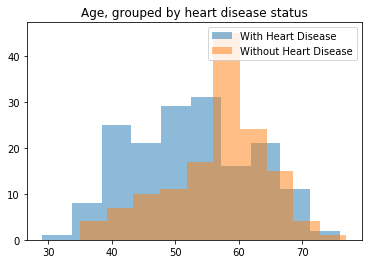

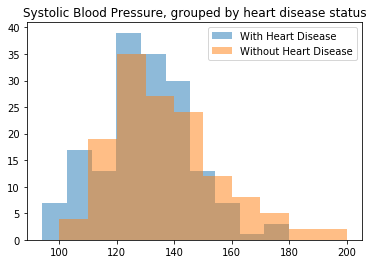

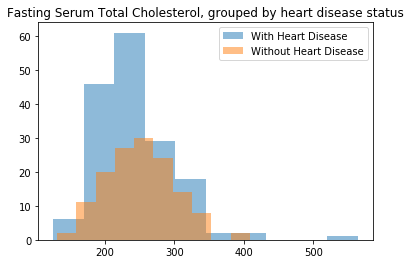

In [7]:
#make new dataframes for individuals with and without heartdisease
hd_pos_df = pd.DataFrame()
hd_pos_df = heartdisease_df[heartdisease_df['target'] == 1]


hd_neg_df = pd.DataFrame()
hd_neg_df = heartdisease_df[heartdisease_df['target'] == 0]

print(hd_pos_df.describe())
print(hd_neg_df.describe())

plt.hist(hd_pos_df['age'], alpha=0.5, label='With Heart Disease') 
plt.hist(hd_neg_df['age'], alpha=0.5, label='Without Heart Disease') 
plt.legend(loc='upper right') 
plt.title('Age, grouped by heart disease status')
plt.show()

plt.hist(hd_pos_df['trestbps'], alpha=0.5, label='With Heart Disease') 
plt.hist(hd_neg_df['trestbps'], alpha=0.5, label='Without Heart Disease') 
plt.legend(loc='upper right') 
plt.title('Systolic Blood Pressure, grouped by heart disease status')
plt.show()

plt.hist(hd_pos_df['chol'], alpha=0.5, label='With Heart Disease') 
plt.hist(hd_neg_df['chol'], alpha=0.5, label='Without Heart Disease') 
plt.legend(loc='upper right') 
plt.title('Fasting Serum Total Cholesterol, grouped by heart disease status')
plt.show()

# Analytical Questions

1. What are the variables with the highest variance and how are the categorical variables distributed among those with and without heart disease? Is this variance equal among those with and without heart disease?

2. If the dataset is divided into two subsets, those without heart disease and those with heart disease, are there significant differences in the variables that can be measured non-invasively as measured by student's t-test or chi-squared?

3. If we futher divide the sample based on sex, are the significant differences between males and females as assessed via student's t-test or chi-squared for continous variables.

## Analytical Question 1 - What are the variables with the highest variance and how are the categorical variables distributed among those with and without heart disease? Is this variance equal among those with and without heart disease?

| Variable                                         |  Mean (HD-)  | Standard Deviation | Mean (HD+)   | Standard Deviation |
|--------------------------------------------------|--------------|--------------------|--------------|--------------------|
| Age                                              | 52.49        | 9.55               | 56.60        | 7.96               |
| Resting Systolic Blood Pressure                  | 129.30       | 16.17              | 134.40       | 18.73              |
| Cholesterol: fasting serum cholestoral in mg/dl  | 242.23       | 53.55              | 251.09       | 49.45              |

The differences in means and variation of the continous variables in this dataset were mostly as I expected. Age is lower for those without established heart disease and systolic blood pressure and fasting cholesterol are higher. From eye balling the data, I would predict there is not a statistically significant difference between the two groups in this population for any of the continous variables. Analysis of the histograms further support this; there is significant overlap between these datesets. That being said the average differences in blood pressure and fasting cholesterol would be considered clinically significant. 

This only accounts for the continous variables in this dataset. It is also important to consider the scaled categorical variables.

## Analytical Question 2 - If the dataset is divided into two subsets, those without heart disease and those with heart disease, are there significant differences in the variables that can be measured non-invasively as measured by student's t-test or chi-squared?

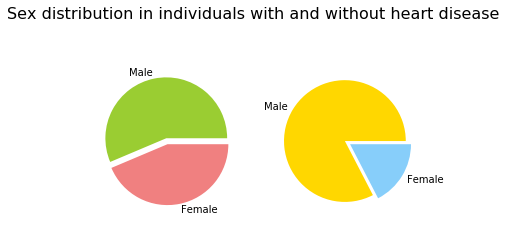

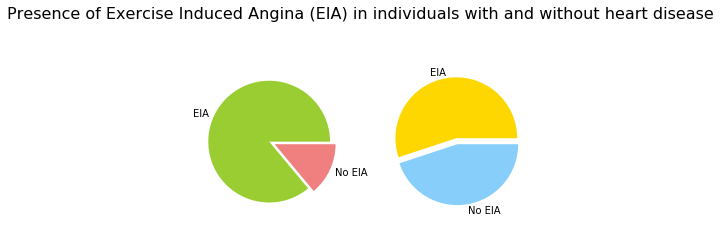

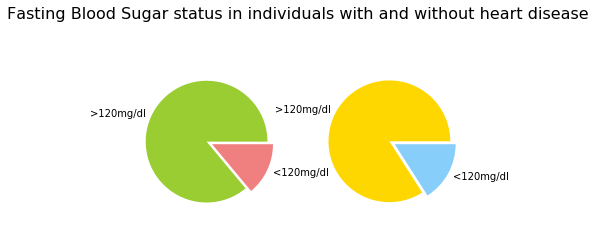

In [8]:
#should change color of pie charts to indicate status...try to put side by side
explode_settings=(0.1,0)
sexlabels = ['Male', 'Female']
anginalabels = ['EIA', 'No EIA']
fbslabels = ['>120mg/dl','<120mg/dl']
heartdiseasecolors= ['yellowgreen', 'lightcoral'] 
noheartdiseasecolors = ['gold', 'lightskyblue']
cp_labels = ['No angina','typical angina', 'atypical angina', 'non-anginal pain']

#make figure to show pie charts side to side for quick comparison
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Sex distribution in individuals with and without heart disease', fontsize=16)

hd_pos_sex_counts = pd.DataFrame(hd_pos_df.sex.value_counts())

ax1.pie(hd_pos_sex_counts, explode=explode_settings, labels=sexlabels,colors=heartdiseasecolors)

hd_neg_sex_counts = pd.DataFrame(hd_neg_df.sex.value_counts())

ax2.pie(hd_neg_sex_counts,explode=explode_settings, labels=sexlabels,colors=noheartdiseasecolors)

plt.show()

#make figure to show pie charts side to side for quick comparison
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Presence of Exercise Induced Angina (EIA) in individuals with and without heart disease', fontsize=16)

hd_pos_ex_angina_counts = pd.DataFrame(hd_pos_df.exang.value_counts())

ax1.pie(hd_pos_ex_angina_counts, explode=explode_settings, labels=anginalabels,colors=heartdiseasecolors)

hd_neg_ex_angina_counts = pd.DataFrame(hd_neg_df.exang.value_counts())

ax2.pie(hd_neg_ex_angina_counts,explode=explode_settings, labels=anginalabels,colors=noheartdiseasecolors)

plt.show()

#make figure to show pie charts side to side for quick comparison
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Fasting Blood Sugar status in individuals with and without heart disease', fontsize=16)

hd_pos_fbs_over120mgdl_counts = pd.DataFrame(hd_pos_df.fbs.value_counts())

ax1.pie(hd_pos_fbs_over120mgdl_counts,explode=explode_settings, labels=fbslabels,colors=heartdiseasecolors)


hd_neg_fbs_over120mgdl_counts = pd.DataFrame(hd_neg_df.fbs.value_counts())

ax2.pie(hd_neg_fbs_over120mgdl_counts,explode=explode_settings, labels=fbslabels,colors=noheartdiseasecolors)


plt.show()


The data above shows that sex and presence of exercise induced angina are distributed quite differently in individuals with and without heart disease. This relationship does not hold for fasting blood sugar status.

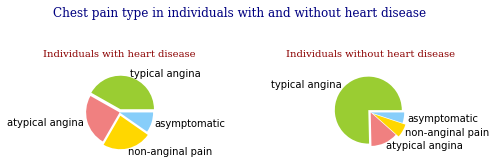

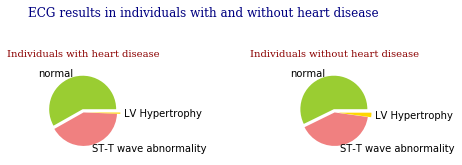

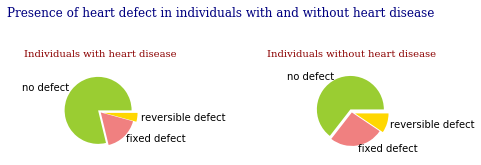

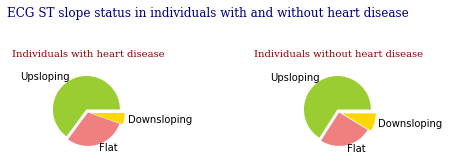

In [9]:
#next step is to look at the 4 categorical variables...it might be better to change these  to pie charts...
#make labels to convert from scaled categorical values

cp_labels=['typical angina','atypical angina', 'non-anginal pain', 'asymptomatic']
cp_labels_abbr=['typical angina','atypical angina', 'non-anginal pain']
ecg_labels=['normal', 'ST-T wave abnormality','LV Hypertrophy']
ecg_labels2=['normal', 'ST-T wave abnormality']
thal_labels=['no defect', 'fixed defect', 'reversible defect']
slope_labels=['Upsloping', 'Flat', 'Downsloping']


#make colormap, font dictionary and explode settings
defaultcolormap = ['yellowgreen', 'lightcoral', 'gold', 'lightskyblue']
explode_settings_4=(0.1,0,0.1,0)
explode_settings_3=(0.1,0,0.1)
subplot_fontdict = font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10,
        }
figuretitle_fontdict = font = {'family': 'serif',
        'color':  'navy',
        'weight': 'bold',
        'size': 24,
        }


#make counts so I can plot these appropriately

hd_pos_cp_counts = pd.DataFrame(hd_pos_df.cp.value_counts())
hd_neg_cp_counts = pd.DataFrame(hd_neg_df.cp.value_counts())

hd_pos_ecg_counts = pd.DataFrame(hd_pos_df.restecg.value_counts())
hd_neg_ecg_counts = pd.DataFrame(hd_neg_df.restecg.value_counts())

hd_pos_thal_counts = pd.DataFrame(hd_pos_df.thal.value_counts())
hd_neg_thal_counts = pd.DataFrame(hd_neg_df.thal.value_counts())

hd_pos_slope_counts = pd.DataFrame(hd_pos_df.slope.value_counts())
hd_neg_slope_counts = pd.DataFrame(hd_neg_df.slope.value_counts())

#make pie charts for easy comparison
#cp pie chart

fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.1, wspace=2, hspace=0)

for i in range(2):
        ax = axes[i]
        if i == 0:
            title = ax.set_title("Individuals with heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)
        else:
            title = ax.set_title("Individuals without heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)

fig.suptitle('Chest pain type in individuals with and without heart disease', fontdict=figuretitle_fontdict)


axes[0].pie(hd_pos_cp_counts, explode=explode_settings_4, labels=cp_labels,colors=defaultcolormap)

axes[1].pie(hd_neg_cp_counts,explode=explode_settings_4, labels=cp_labels,colors=defaultcolormap)

plt.show()

#ecg data pie chart

fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.1, wspace=2, hspace=0)

for i in range(2):
        ax = axes[i]
        if i == 0:
            title = ax.set_title("Individuals with heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)
        else:
            title = ax.set_title("Individuals without heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)

fig.suptitle('ECG results in individuals with and without heart disease', fontdict=figuretitle_fontdict)


axes[0].pie(hd_pos_ecg_counts, explode=explode_settings_3, labels=ecg_labels,colors=defaultcolormap)

axes[1].pie(hd_neg_ecg_counts,explode=explode_settings_3, labels=ecg_labels,colors=defaultcolormap)

plt.show()

#thal data pie chart

fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.1, wspace=2, hspace=0)

for i in range(2):
        ax = axes[i]
        if i == 0:
            title = ax.set_title("Individuals with heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)
        else:
            title = ax.set_title("Individuals without heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)

fig.suptitle('Presence of heart defect in individuals with and without heart disease', fontdict=figuretitle_fontdict)


axes[0].pie(hd_pos_thal_counts, explode=explode_settings_3, labels=thal_labels,colors=defaultcolormap)

axes[1].pie(hd_neg_thal_counts,explode=explode_settings_3, labels=thal_labels,colors=defaultcolormap)

plt.show()

#slope of st depression pie chart

fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.1, wspace=2, hspace=0)

for i in range(2):
        ax = axes[i]
        if i == 0:
            title = ax.set_title("Individuals with heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)
        else:
            title = ax.set_title("Individuals without heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)

fig.suptitle('ECG ST slope status in individuals with and without heart disease', fontdict=figuretitle_fontdict)


axes[0].pie(hd_pos_slope_counts, explode=explode_settings_3, labels=slope_labels,colors=defaultcolormap)

axes[1].pie(hd_neg_slope_counts,explode=explode_settings_3, labels=slope_labels,colors=defaultcolormap)

plt.show()



The distribution of the categorical variables shows more pronounced differences. 

There is a clear trend for those individuals with heart disease to present some degree of angina. This is also reflected in the presence of heart defects, which are more common in the group presenting with heart disease. However, the ECG results and ECG slope analyses do not present as clear cut a correlation with disease status.

The next step of this analysis will be to test the statistical significance of these differences for both continous and categorical variables:

In [10]:
#let's test categorical variables first
print(ttest_ind(hd_pos_df['age'], hd_neg_df['age'], equal_var=True))

print(ttest_ind(hd_pos_df['trestbps'], hd_neg_df['trestbps'], equal_var=True))

print(ttest_ind(hd_pos_df['chol'], hd_neg_df['chol'], equal_var=True))

Ttest_indResult(statistic=-4.014560975148874, pvalue=7.524801303442373e-05)
Ttest_indResult(statistic=-2.5412927171039, pvalue=0.011546059200233312)
Ttest_indResult(statistic=-1.4842450762526977, pvalue=0.13879032695600638)


Although it was unexpected, the populational differences in age and resting systolic blood pressure were statistical significant at 98% confidence interval. The difference in total fasting serum cholesterol do not look to be statistical significant.

Next step is to investigate the categorical distributions.

In [11]:
#sample sizes for these hd pos and hd neg populations are different....makes the chi squared analysis non viable need to fix....
#sample size for hd pos population is 165 versus 138 for hd neg..need to randomly sample 138 of hd pos population for this analysis


hd_pos_df_138 = hd_pos_df.sample(n=138)

observed_hdpos_cp = pd.DataFrame(hd_pos_df_138.cp.value_counts())

observed_hdpos_ecg = pd.DataFrame(hd_pos_df_138.restecg.value_counts())


observed_hdpos_thal= pd.DataFrame(hd_pos_df_138.thal.value_counts())


observed_hdpos_slope = pd.DataFrame(hd_pos_df_138.slope.value_counts())



#chi-squared for chest pain data

hdneg_cp_ratio = hd_neg_cp_counts/len(hd_neg_df)

expected_hdpos_cp = hdneg_cp_ratio * len(hd_pos_df_138)

cp_chi_squared_stat = (((observed_hdpos_cp-expected_hdpos_cp)**2)/expected_hdpos_cp).sum()
print(cp_chi_squared_stat)

cp_crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 3)   # Df = number of variable categories - 1

print("Critical value")
print(cp_crit)

cp_p_value = 1 - stats.chi2.cdf(x=cp_chi_squared_stat,  # Find the p-value
                             df=3)
print("P value")
print(cp_p_value)

#chi-squared for ecg data

hdneg_ecg_ratio = hd_neg_ecg_counts/len(hd_neg_df)

expected_hdpos_ecg = hdneg_ecg_ratio * len(hd_pos_df_138)

ecg_chi_squared_stat = (((observed_hdpos_ecg-expected_hdpos_ecg)**2)/expected_hdpos_ecg).sum()
print(ecg_chi_squared_stat)

ecg_crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 2)   # Df = number of variable categories - 1

print("Critical value")
print(ecg_crit)

ecg_p_value = 1 - stats.chi2.cdf(x=ecg_chi_squared_stat,  # Find the p-value
                             df=2)
print("P value")
print(ecg_p_value)

#chi-squared for thal data

hdneg_thal_ratio = hd_neg_thal_counts/len(hd_neg_df)

expected_hdpos_thal = hdneg_thal_ratio * len(hd_pos_df_138)

thal_chi_squared_stat = (((observed_hdpos_thal-expected_hdpos_thal)**2)/expected_hdpos_thal).sum()
print(thal_chi_squared_stat)

thal_crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 2)   # Df = number of variable categories - 1

print("Critical value")
print(thal_crit)

thal_p_value = 1 - stats.chi2.cdf(x=thal_chi_squared_stat,  # Find the p-value
                             df=2)
print("P value")
print(thal_p_value)

#chi-squared for slope data

hdneg_slope_ratio = hd_neg_slope_counts/len(hd_neg_df)

expected_hdpos_slope = hdneg_slope_ratio * len(hd_pos_df_138)

slope_chi_squared_stat = (((observed_hdpos_slope-expected_hdpos_slope)**2)/expected_hdpos_slope).sum()
print(slope_chi_squared_stat)

slope_crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 2)   # Df = number of variable categories - 1

print("Critical value")
print(slope_crit)

slope_p_value = 1 - stats.chi2.cdf(x=slope_chi_squared_stat,  # Find the p-value
                             df=2)
print("P value")
print(slope_p_value)





cp    199.889957
dtype: float64
Critical value
7.814727903251179
P value
[0.]
restecg    16.36204
dtype: float64
Critical value
5.991464547107979
P value
[0.00027992]
thal    184.902814
dtype: float64
Critical value
5.991464547107979
P value
[0.]
slope    107.975092
dtype: float64
Critical value
5.991464547107979
P value
[0.]


For the categorical variables tested above, namely ECG results, ECG slope, maximum heart rate and chest pain, the distribution of these categorical variables differed considerably between heart disease positive and heart disease negative. This was not what was predicted initially. The visualization of the data seemed to suggest that the presence of heart defects and angina would reflect more clearly on the presence of heart diseas ethan ECG results or ECG slope analyses. The chi-squared test suggests that the distribution of all these variables differ signficantly in those with heart disease and those without.

If we futher divide the sample based on sex, do the results in 2 stand for both males and females? 

## Analytical Question 3 - If we futher divide the sample based on sex, are the significant differences between males and females as assessed via student's t-test or chi-squared for continous variables.

In [12]:
#create dateframe for males and females depending on heart disease status

hd_pos_male_df = hd_pos_df[hd_pos_df['sex'] == 1]

hd_neg_male_df = hd_neg_df[hd_neg_df['sex'] == 1]

hd_pos_female_df = hd_pos_df[hd_pos_df['sex'] == 0]

hd_neg_female_df = hd_neg_df[hd_neg_df['sex'] == 0]

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


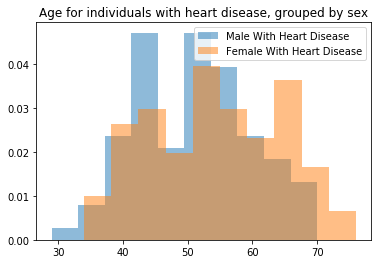

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


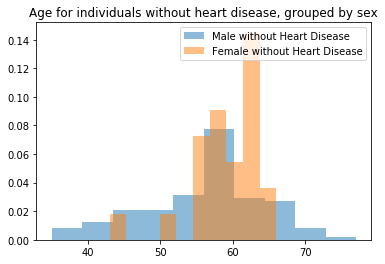

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


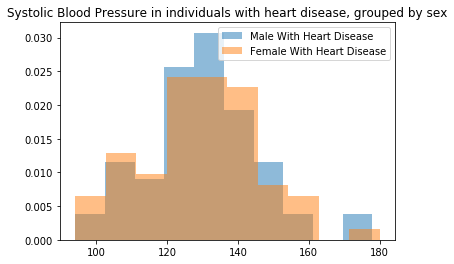

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


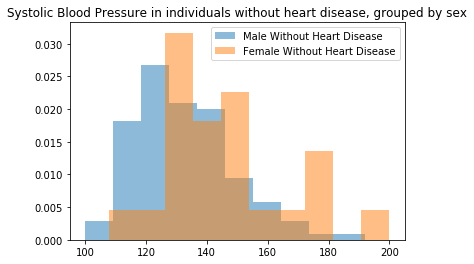

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


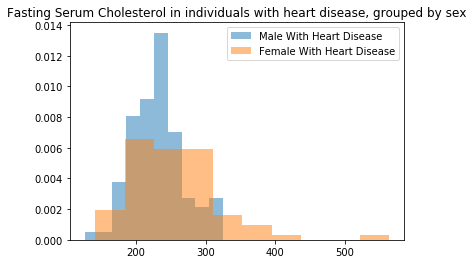

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


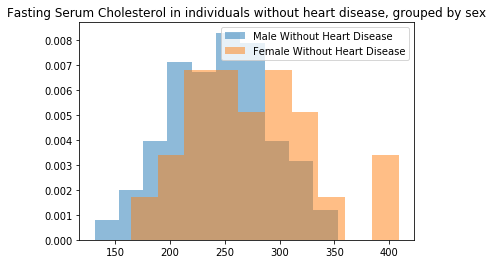

In [13]:
#data has been normalized here due to the fact that the size of the populations differ too significantly to allow adequate comparison

plt.hist(hd_pos_male_df['age'], alpha=0.5, label='Male With Heart Disease', normed= True) 
plt.hist(hd_pos_female_df['age'], alpha=0.5, label='Female With Heart Disease', normed= True) 
plt.legend(loc='upper right') 
plt.title('Age for individuals with heart disease, grouped by sex')
plt.show()

plt.hist(hd_neg_male_df['age'], alpha=0.5, label='Male without Heart Disease', normed= True) 
plt.hist(hd_neg_female_df['age'], alpha=0.5, label='Female without Heart Disease', normed= True) 
plt.legend(loc='upper right') 
plt.title('Age for individuals without heart disease, grouped by sex')
plt.show()

plt.hist(hd_pos_male_df['trestbps'], alpha=0.5, label='Male With Heart Disease', normed=True) 
plt.hist(hd_pos_female_df['trestbps'], alpha=0.5, label='Female With Heart Disease', normed=True) 
plt.legend(loc='upper right') 
plt.title('Systolic Blood Pressure in individuals with heart disease, grouped by sex')
plt.show()

plt.hist(hd_neg_male_df['trestbps'], alpha=0.5, label='Male Without Heart Disease', normed=True) 
plt.hist(hd_neg_female_df['trestbps'], alpha=0.5, label='Female Without Heart Disease', normed=True) 
plt.legend(loc='upper right') 
plt.title('Systolic Blood Pressure in individuals without heart disease, grouped by sex')
plt.show()


plt.hist(hd_pos_male_df['chol'], alpha=0.5, label='Male With Heart Disease', normed=True) 
plt.hist(hd_pos_female_df['chol'], alpha=0.5, label='Female With Heart Disease', normed=True) 
plt.legend(loc='upper right') 
plt.title('Fasting Serum Cholesterol in individuals with heart disease, grouped by sex')
plt.show()

plt.hist(hd_neg_male_df['chol'], alpha=0.5, label='Male Without Heart Disease', normed=True) 
plt.hist(hd_neg_female_df['chol'], alpha=0.5, label='Female Without Heart Disease', normed=True) 
plt.legend(loc='upper right') 
plt.title('Fasting Serum Cholesterol in individuals without heart disease, grouped by sex')
plt.show()


Apart from age, the data does not suggest any specific Sex * Heart Disease Status interactions.  It seems that when heart disease presents in female, it is delayed relative to male counterparts. This might be logically predicted based on heart disease rate comparisons between males and females. This interaction could be further investigated via an ANCOVA, but is beyond the scope of this project.


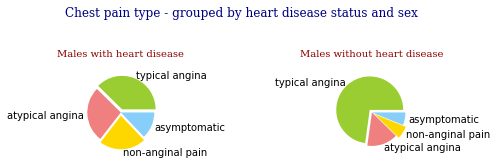

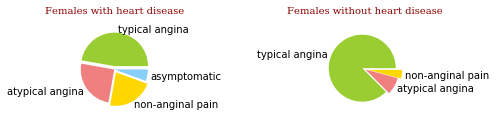

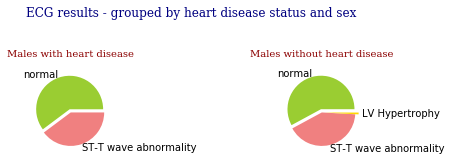

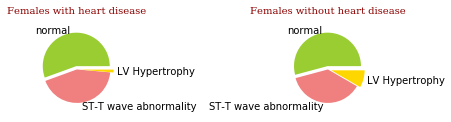

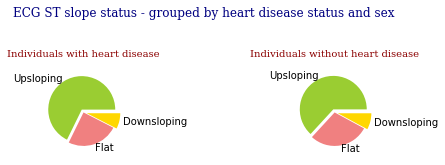

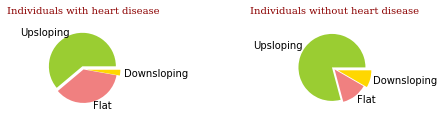

In [14]:
#next step is to look at the 4 categorical variables...it might be better to change these  to pie charts...


#make colormap, font dictionary and explode settings
defaultcolormap = ['yellowgreen', 'lightcoral', 'gold', 'lightskyblue']
explode_settings_4=(0.1,0,0.1,0)
explode_settings_3=(0.1,0,0.1)
explode_settings_2=(0.1,0)
subplot_fontdict = font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10,
        }
figuretitle_fontdict = font = {'family': 'serif',
        'color':  'navy',
        'weight': 'bold',
        'size': 24,
        }

#make counts for males

hd_pos_cp_counts_males = pd.DataFrame(hd_pos_male_df.cp.value_counts())
hd_neg_cp_counts_males = pd.DataFrame(hd_neg_male_df.cp.value_counts())

hd_pos_ecg_counts_males = pd.DataFrame(hd_pos_male_df.restecg.value_counts())
hd_neg_ecg_counts_males = pd.DataFrame(hd_neg_male_df.restecg.value_counts())

hd_pos_thal_counts_males = pd.DataFrame(hd_pos_male_df.thal.value_counts())
hd_neg_thal_counts_males = pd.DataFrame(hd_neg_male_df.thal.value_counts())

hd_pos_slope_counts_males = pd.DataFrame(hd_pos_male_df.slope.value_counts())
hd_neg_slope_counts_males = pd.DataFrame(hd_neg_male_df.slope.value_counts())

#make counts for females

hd_pos_cp_counts_females = pd.DataFrame(hd_pos_female_df.cp.value_counts())
hd_neg_cp_counts_females = pd.DataFrame(hd_neg_female_df.cp.value_counts())

hd_pos_ecg_counts_females = pd.DataFrame(hd_pos_female_df.restecg.value_counts())
hd_neg_ecg_counts_females = pd.DataFrame(hd_neg_female_df.restecg.value_counts())

hd_pos_thal_counts_females = pd.DataFrame(hd_pos_female_df.thal.value_counts())
hd_neg_thal_counts_females = pd.DataFrame(hd_neg_female_df.thal.value_counts())

hd_pos_slope_counts_females = pd.DataFrame(hd_pos_female_df.slope.value_counts())
hd_neg_slope_counts_females = pd.DataFrame(hd_neg_female_df.slope.value_counts())


#make labels to convert from scaled categorical values

cp_labels=['typical angina','atypical angina', 'non-anginal pain', 'asymptomatic']
cp_labels_abbr=['typical angina','atypical angina', 'non-anginal pain']
ecg_labels=['normal', 'ST-T wave abnormality','LV Hypertrophy']
ecg_labels2=['normal', 'ST-T wave abnormality']
thal_labels=['no defect', 'fixed defect', 'reversible defect']
slope_labels=['Upsloping', 'Flat', 'Downsloping']

#make pie charts for easy comparison
#cp pie chart

fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.1, wspace=2, hspace=0)

for i in range(2):
        ax = axes[i]
        if i == 0:
            title = ax.set_title("Males with heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)
        else:
            title = ax.set_title("Males without heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)

fig.suptitle('Chest pain type - grouped by heart disease status and sex', fontdict=figuretitle_fontdict)


axes[0].pie(hd_pos_cp_counts_males, explode=explode_settings_4, labels=cp_labels,colors=defaultcolormap)

axes[1].pie(hd_neg_cp_counts_males,explode=explode_settings_4, labels=cp_labels,colors=defaultcolormap)

plt.show()

fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.1, wspace=2, hspace=0)

for i in range(2):
        ax = axes[i]
        if i == 0:
            title = ax.set_title("Females with heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)
        else:
            title = ax.set_title("Females without heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)


axes[0].pie(hd_pos_cp_counts_females, explode=explode_settings_4, labels=cp_labels,colors=defaultcolormap)

axes[1].pie(hd_neg_cp_counts_females,explode=explode_settings_3, labels=cp_labels_abbr,colors=defaultcolormap)

plt.show()


#ecg chart

fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.1, wspace=2, hspace=0)

for i in range(2):
        ax = axes[i]
        if i == 0:
            title = ax.set_title("Males with heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)
        else:
            title = ax.set_title("Males without heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)

fig.suptitle('ECG results - grouped by heart disease status and sex', fontdict=figuretitle_fontdict)


axes[0].pie(hd_pos_ecg_counts_males, explode=explode_settings_2, labels=ecg_labels2,colors=defaultcolormap)

axes[1].pie(hd_neg_ecg_counts_males,explode=explode_settings_3, labels=ecg_labels,colors=defaultcolormap)

plt.show()

fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.1, wspace=2, hspace=0)

for i in range(2):
        ax = axes[i]
        if i == 0:
            title = ax.set_title("Females with heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)
        else:
            title = ax.set_title("Females without heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)


axes[0].pie(hd_pos_ecg_counts_females, explode=explode_settings_3, labels=ecg_labels,colors=defaultcolormap)

axes[1].pie(hd_neg_ecg_counts_females,explode=explode_settings_3, labels=ecg_labels,colors=defaultcolormap)

plt.show()

#slope of st depression pie chart

fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.1, wspace=2, hspace=0)

for i in range(2):
        ax = axes[i]
        if i == 0:
            title = ax.set_title("Individuals with heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)
        else:
            title = ax.set_title("Individuals without heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)

fig.suptitle('ECG ST slope status - grouped by heart disease status and sex', fontdict=figuretitle_fontdict)


axes[0].pie(hd_pos_slope_counts_males, explode=explode_settings_3, labels=slope_labels,colors=defaultcolormap)

axes[1].pie(hd_neg_slope_counts_males,explode=explode_settings_3, labels=slope_labels,colors=defaultcolormap)

plt.show()

fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.1, wspace=2, hspace=0)

for i in range(2):
        ax = axes[i]
        if i == 0:
            title = ax.set_title("Individuals with heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)
        else:
            title = ax.set_title("Individuals without heart disease",fontdict=subplot_fontdict, loc='center', y=1.1)


axes[0].pie(hd_pos_slope_counts_females, explode=explode_settings_3, labels=slope_labels,colors=defaultcolormap)

axes[1].pie(hd_neg_slope_counts_females,explode=explode_settings_3, labels=slope_labels,colors=defaultcolormap)

plt.show()


The data seems to be suggest that women without heartdisease have left ventricular hypertrophy more than those with heart disease. I would propose that this is an artifact of insufficient sample size (n=24 for Heart Disease negative females and n=72 for heart disease positive females). Other than this, individuals with heart disease, regardless of sex, tend to have greater incidence of atypical angina and non-anginal pain. 

Given the small sample size, chi-squared analyses will not be conducted on these categorical vairables. A logical next step in this instance would be to ascertain the availability of alternative publically facing datasets and then work on assessing the predictive capacity of the data. Previous work in this field, along with the differences shown in this dataset are suggestive of this approach having utility and this needs to be further explored. 

The histogram visualizations for sex X heart disease status interactions were suggestive of a difference. In order to minimize the possibility of false positives for our statistical analyses we will test only this data as a final analyses.

In [15]:
#let's test categorical variables first
print(ttest_ind(hd_neg_female_df['age'], hd_neg_male_df['age'], equal_var=True))

print(ttest_ind(hd_pos_female_df['age'], hd_neg_male_df['age'], equal_var=True))

Ttest_indResult(statistic=1.6625427949761509, pvalue=0.09870706247137957)
Ttest_indResult(statistic=-1.111570349740478, pvalue=0.2677732364022156)


The results do not support a statistically signficiant interaction between age and sex that predicts heart disease. 

## Summary

In summary, the populational differences in age and resting systolic blood pressure were statistical significant at 98% confidence interval. The difference in total fasting serum cholesterol do not look to be statistical significant. There do not seem to be any differences depending on sex and heart disease status for continous variables. However, the data show that therestatistically significant differences in the distribution of the categorical variables measured based on heart disease status and suggest that there are heart disease and sex status interactions. Future work should include further interactions of heart and sex status interactions in a larger data set. Furthermore, a total of 8 out of 10 the variables which are non-invasive and easily and accurately measured, showed significant association with heart disease status. It should be futher explored whether heart disease can be predicted via ML methods using *only the variables that can measured easily, accurately, non-invasively and remotely*. This approach if shown to be viable, would have both raw market value and value as a means to offer cost effective public health interventions to those who are geographically removed from health care.


In [16]:
print(hd_neg_female_df.describe())

             age   sex         cp    trestbps        chol        fbs  \
count  24.000000  24.0  24.000000   24.000000   24.000000  24.000000   
mean   59.041667   0.0   0.166667  146.125000  274.958333   0.250000   
std     4.964913   0.0   0.481543   21.436078   60.863696   0.442326   
min    43.000000   0.0   0.000000  108.000000  164.000000   0.000000   
25%    56.750000   0.0   0.000000  130.000000  234.000000   0.000000   
50%    60.500000   0.0   0.000000  140.000000  265.500000   0.000000   
75%    62.000000   0.0   0.000000  152.500000  310.000000   0.250000   
max    66.000000   0.0   2.000000  200.000000  409.000000   1.000000   

         restecg     thalach      exang    oldpeak      slope         ca  \
count  24.000000   24.000000  24.000000  24.000000  24.000000  24.000000   
mean    0.541667  142.416667   0.583333   1.841667   0.958333   1.291667   
std     0.658005   20.256865   0.503610   1.608379   0.464306   1.160179   
min     0.000000   97.000000   0.000000   0.000

# Testing OLS versus KNN regression

First step in this process will be splitting the data so we can do cross validation.

In [17]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
group1, group2 = train_test_split(heartdisease_df, test_size=0.3, random_state=20)


Let's find variables that have a somewhat linear relationship:

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


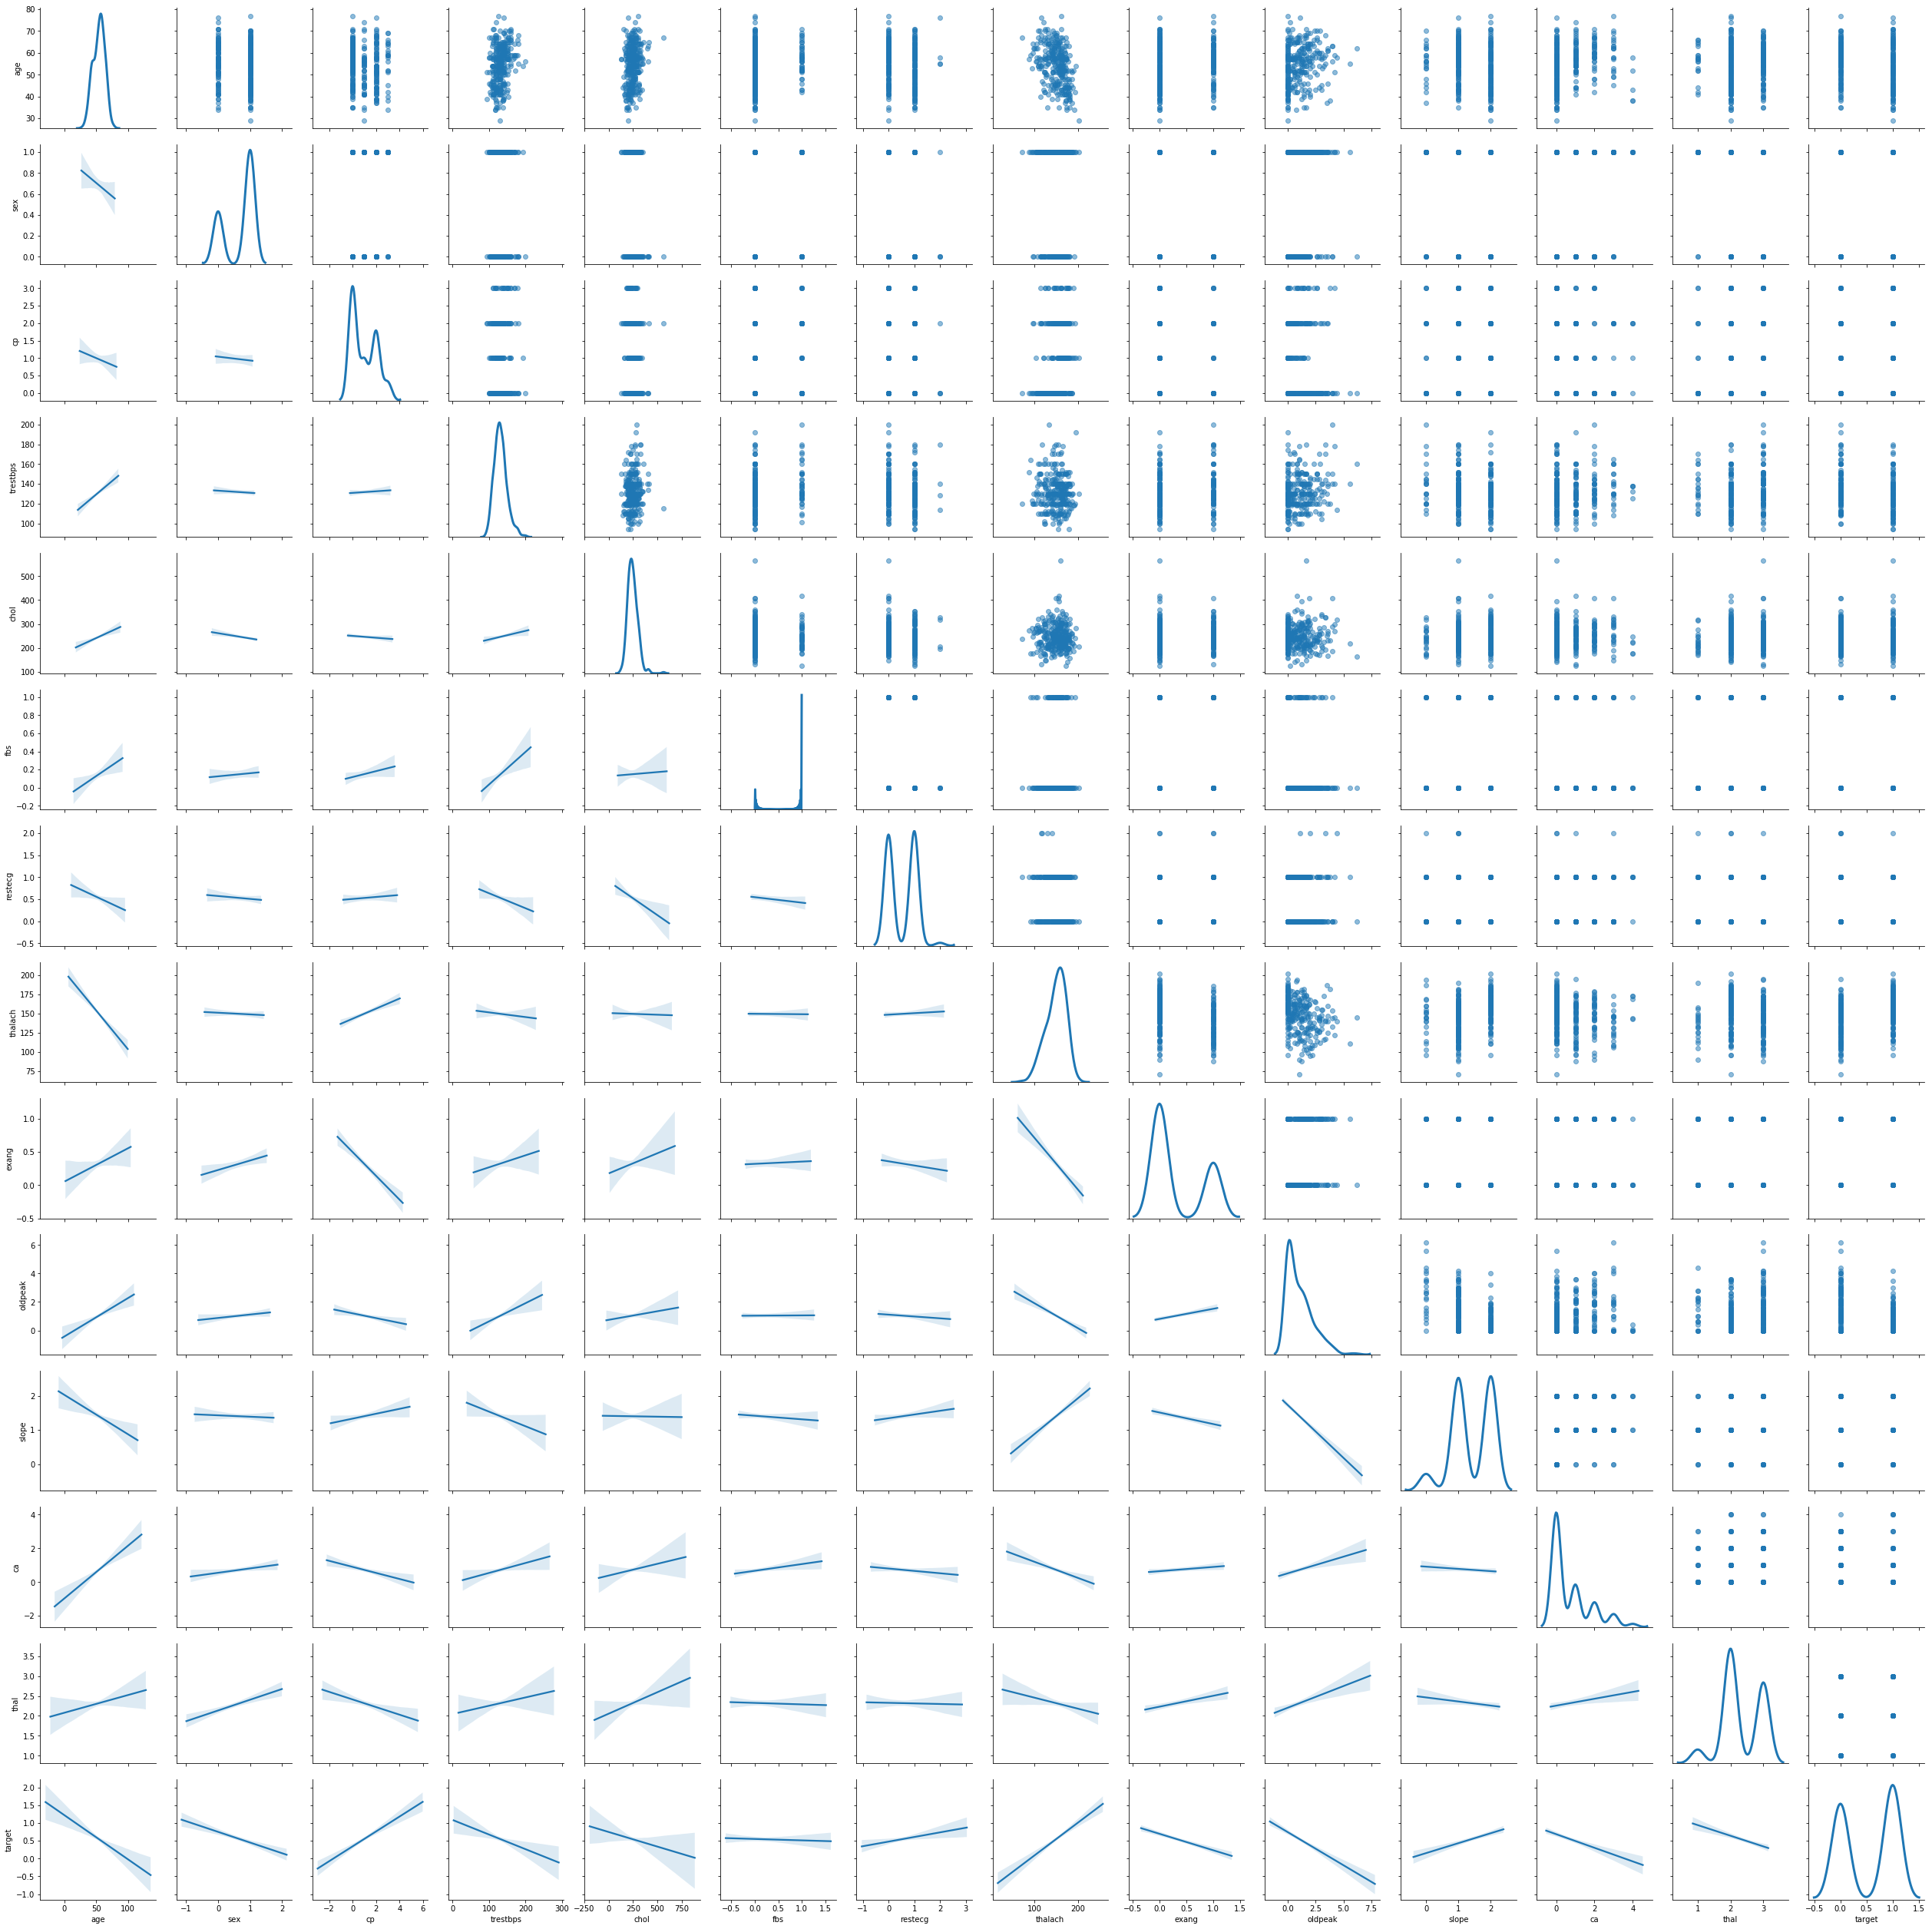

In [18]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(heartdisease_df.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [19]:
correlation_matrix = heartdisease_df.corr()
display(correlation_matrix)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.067997,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.212731,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.166833,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.061998,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.094312,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.022066,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.012982,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.106598,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.217851,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.212139,-0.430696


In [32]:
from sklearn import linear_model
import statsmodels.formula.api as smf

# Instantiate and fit our model.
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = heartdisease_df['target'].values.reshape(-1, 1)
X = heartdisease_df[['age', 'chol', 'oldpeak', 'fbs', 'slope', 'trestbps', 'thalach' ]]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-0.00051537 -0.00055592 -0.1187421  -0.01091632  0.05067433 -0.00167862
   0.00643037]]

Intercept: 
 [0.02229418]

R-squared:
0.28102445647196905


Not a great model. Let's take a quick look at what KNN regression turns out like:

In [35]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=35)
knn.fit(X, Y)

#getscore
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: -0.00 (+/- 0.01)


KNN regression doesn't work great here. Linear regression shows some ability to predict, KNN on the other hand does not.

In this case, the presence of heart disease can somewhat be predicted by multivariate linear regression. If you look at the  regression plot above, heart disease is clearly associated with increases and decreases in certain continous variables and with certain categorical variables. Linear regression does an ok job at picking out these effects.

KNN on the other hand does not do a great job - the reason for this is that there is significant noise in the data. Just because another individual's data is close, does not mean we can predict other's based on their data. Increasing the k-value makes no difference to do this. If we take the trend for the whole population however, which is the case with OLS regression, we can tease out some of the associations and have these show up in the predictive power of our model. The truth is, neither of these models are suitable for this utility. That being said, of the two bad choices, OLS is the clearly the better model.

Let's try some logistic regression models instead.

## Logistic regression

In [71]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

#need to fix Y into a dataframe in order to be compatible with the functions below

Y=pd.DataFrame(Y)

In [72]:
Y=Y.apply(pd.to_numeric)

Y=np.ravel(Y)

In [94]:
# Declare a logistic regression classifier

lr = LogisticRegression()

# Fit the model.
fit = lr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))
print('\n R-squared')
print(r2_score(Y, pred_y_sklearn))

Coefficients
[[-0.00856993 -0.00345139 -0.65179706 -0.00974819  0.23587116 -0.01327622
   0.02966362 -0.4181651 ]]
[-0.4181651]

 Accuracy by admission status
col_0   0    1
row_0         
0      92   33
1      46  132

 Percentage accuracy
0.7392739273927392

 R-squared
-0.05125164690382111


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
# Declare a logistic regression classifier - let's try L2 or ridge regression
lr = LogisticRegression(penalty='l2')

# Fit the model.
fit = lr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))
print('\n R-squared')
print(r2_score(Y, pred_y_sklearn))

Coefficients
[[-0.00856993 -0.00345139 -0.65179706 -0.00974819  0.23587116 -0.01327622
   0.02966362 -0.4181651 ]]
[-0.4181651]

 Accuracy by admission status
col_0   0    1
row_0         
0      92   33
1      46  132

 Percentage accuracy
0.7392739273927392

 R-squared
-0.05125164690382111


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [93]:
# Declare a logistic regression classifier - let's try lasso regression
lr = LogisticRegression(penalty='l1')

# Fit the model.
fit = lr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))
print('\n R-squared')
print(r2_score(Y, pred_y_sklearn))

Coefficients
[[-0.01235463 -0.00363286 -0.67090044  0.          0.17726728 -0.01481455
   0.02780782  0.        ]]
[0.]

 Accuracy by admission status
col_0   0    1
row_0         
0      92   35
1      46  130

 Percentage accuracy
0.7326732673267327

 R-squared
-0.07786561264822156


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Let's test the models:

In [103]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y,  test_size=0.7, random_state=20)

# test regular logistic regression

In [132]:
# Declare a logistic regression classifier

lr = LogisticRegression()

# Fit the model.
fit = lr.fit(train_X, train_Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(train_X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, train_Y))

print('\n Percentage accuracy')
print(lr.score(train_X, train_Y))
print('\n R-squared')
print(r2_score(train_Y, pred_y_sklearn))

Coefficients
[[ 0.03730172 -0.00418074 -0.6818066  -0.09502272 -0.01313348 -0.0359583
   0.03711647 -0.40974813]]
[-0.40974813]

 Accuracy by admission status
col_0   0   1
row_0        
0      45  18
1      23  65

 Percentage accuracy
0.7284768211920529

 R-squared
-0.09691708008504607


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [131]:
print('\n Percentage accuracy')
print(lr.score(test_X, test_Y))


 Percentage accuracy
0.7236842105263158


Looks fine....let's try the next one...

# test ridge regression

In [133]:
# Declare a logistic regression classifier

lr = LogisticRegression(penalty='l2')

# Fit the model.
fit = lr.fit(train_X, train_Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(train_X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, train_Y))

print('\n Percentage accuracy')
print(lr.score(train_X, train_Y))
print('\n R-squared')
print(r2_score(train_Y, pred_y_sklearn))

Coefficients
[[ 0.03730172 -0.00418074 -0.6818066  -0.09502272 -0.01313348 -0.0359583
   0.03711647 -0.40974813]]
[-0.40974813]

 Accuracy by admission status
col_0   0   1
row_0        
0      45  18
1      23  65

 Percentage accuracy
0.7284768211920529

 R-squared
-0.09691708008504607


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [134]:
print('\n Percentage accuracy')
print(lr.score(test_X, test_Y))


 Percentage accuracy
0.7171052631578947


No difference here from regular logistic regression. Let's test lasso regression...


# test lasso regression

In [135]:
# Declare a logistic regression classifier

lr = LogisticRegression(penalty='l1')

# Fit the model.
fit = lr.fit(train_X, train_Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(train_X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, train_Y))

print('\n Percentage accuracy')
print(lr.score(train_X, train_Y))
print('\n R-squared')
print(r2_score(train_Y, pred_y_sklearn))

Coefficients
[[ 0.03112964 -0.00422569 -0.67252946  0.          0.         -0.03690099
   0.0345966   0.        ]]
[0.]

 Accuracy by admission status
col_0   0   1
row_0        
0      45  18
1      23  65

 Percentage accuracy
0.7284768211920529

 R-squared
-0.09691708008504607


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [136]:
print('\n Percentage accuracy')
print(lr.score(test_X, test_Y))


 Percentage accuracy
0.7302631578947368


It seems that lasso regression performs marginally better than ridge and regular logarithmic regression in this case. Given that this is the case, and lasso regression's main utility is in dropping features that offer little to no predictive power. I'm going to try to rerun lasso regression using all the features:

In [137]:
lassoregdata=heartdisease_df.drop('target',1)

In [138]:
train_X_lasso, test_X_lasso, train_Y_lasso, test_Y_lasso = train_test_split(lassoregdata, Y,  test_size=0.7, random_state=20)

In [140]:
# Declare a logistic regression classifier

lr = LogisticRegression(penalty='l1')

# Fit the model.
fit = lr.fit(train_X_lasso, train_Y_lasso)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(train_X_lasso)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, train_Y_lasso))

print('\n Percentage accuracy')
print(lr.score(train_X_lasso, train_Y_lasso))
print('\n R-squared')
print(r2_score(train_Y_lasso, pred_y_sklearn))

Coefficients
[[ 0.10951894 -1.09357245  0.45626419 -0.0780451  -0.0063848   0.
   0.          0.04713038 -2.03955982 -0.09621777  0.46693385 -0.89367928
  -0.16452595]]
[0.]

 Accuracy by admission status
col_0   0   1
row_0        
0      41   5
1       5  39

 Percentage accuracy
0.8888888888888888

 R-squared
0.5553359683794465


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [142]:
print('\n Percentage accuracy')
print(lr.score(test_X_lasso, test_Y_lasso))


 Percentage accuracy
0.7511737089201878


Model is a little bit overfit, so i'm going to increase the value of the regularization coefficient (C):

In [164]:
reg_coeff = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50,]

lasso_accuracy = []
lasso_rsquared = []
lasso_testresult = []

# Declare a logistic regression classifier
for C in reg_coeff:
    lr = LogisticRegression(C=C, penalty='l1')
# Fit the model.
    fit = lr.fit(train_X_lasso, train_Y_lasso)
    #append key values
    pred_y_sklearn = lr.predict(train_X_lasso)
    lasso_accuracy.append(lr.score(train_X_lasso, train_Y_lasso))
    #lasso_rsquared.append(r2_score(train_Y_lasso, pred_y_sklearn)
    #lasso_testresult.append(lr.score(test_X_lasso, test_Y_lasso))

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklea

In [163]:
print(lasso_testresult)

[0.7511737089201878, 0.7370892018779343, 0.7323943661971831, 0.7230046948356808, 0.7230046948356808, 0.7230046948356808, 0.7230046948356808, 0.7230046948356808, 0.7276995305164319, 0.7276995305164319, 0.7183098591549296, 0.7183098591549296]


In [165]:
print(lasso_accuracy)

[0.8888888888888888, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111]


The best model is the first one it has slightly lower accuracy in the training set but higher accuracy in predicting the outcome of the testing data. This suggest that this model is the least overfit of the bunch. Further to this, this model, which has all of the features included has the highest predictive accuracy of all the models run to date. In total it has an accuracy of about 75%. The rate of sensitivity and specificity are balanced and accordingly the respective rates of false positives and false negatives are balanced. The relative expense of false positives versus false negatives in a model like this need careful consideration due to the outcomes they may present if the model is used in a clinical setting (false positives present risks of medicalizing an otherwise healthy person's life and false negatives would result in telling somebody who is in poor health, that they are ok).